# Drug Risk Analysis

## Introduction

This project aims at unraveling the relationship between personality traits and drug consumption. First, the normalized data is coded into more apprehensible categories. Next we will explore the data to get an overview and a deeper understanding of it.
After that we will discuss a selection of business cases we decided to develop. Since this project is for training purposes and there are already a lot of good analyses online, we opted for a more lighthearted approach.

## About the data set

The data set can be found [here](https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29) (07/01/2020).
The link includes the following description:

"Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.
Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day"."



In [1]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

from math import pi

%matplotlib inline

## Data Cleaning

Even though the data is comprehensive we decided to not use some of the data. Also we had to translate the normalized data into more apprehensible categories.

In [2]:
df = pd.read_excel('Drug_Risk.xls')

In [3]:
df.shape

(1885, 32)

In [4]:
df.columns = [c.lower() for c in df.columns] #changes all titles to lower case letters, this is the way.

In [5]:
df.head()

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,shrooms,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Semeron is a made up substance to test if Participants are exxagerating their consumption.
There a 8 participants that claimed to use Semeron. They can be filtered out since their other replies are not reliable either.
Notice that six of them are between 18 and 24 years old.

In [6]:
df[df.semer != 'CL0']

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,shrooms,nicotine,semer,vsa
727,730,-0.07854,0.48246,-1.73790,-0.09765,-0.31685,-0.58016,0.32197,0.14143,-0.60633,...,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
817,821,-0.95197,-0.48246,-0.61113,-0.09765,-0.50212,-0.67825,1.74091,0.72330,0.13136,...,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1516,1520,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,-0.80615,-1.27553,-1.34289,...,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1533,1537,-0.95197,0.48246,-0.61113,-0.57009,0.11440,-0.46725,0.80523,0.29338,2.03972,...,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1698,1702,0.49788,0.48246,0.45468,-0.57009,-0.31685,1.98437,-0.80615,2.15324,0.76096,...,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1769,1773,-0.95197,-0.48246,-1.22751,-0.57009,-0.22166,-0.34799,1.28610,1.06238,-0.01729,...,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1806,1810,-0.95197,0.48246,-1.43719,-0.57009,-0.31685,1.23461,1.11406,1.06238,-1.47955,...,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1823,1827,-0.95197,0.48246,0.45468,-0.57009,-0.31685,0.22393,-0.30033,0.88309,1.28610,...,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


In [7]:
df = df[df.semer == 'CL0'] #deletes the information about the participants that overclaimed their substance uses

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1877 non-null   int64  
 1   age        1877 non-null   float64
 2   gender     1877 non-null   float64
 3   education  1877 non-null   float64
 4   country    1877 non-null   float64
 5   ethnicity  1877 non-null   float64
 6   nscore     1877 non-null   float64
 7   escore     1877 non-null   float64
 8   oscore     1877 non-null   float64
 9   ascore     1877 non-null   float64
 10  cscore     1877 non-null   float64
 11  impulsive  1877 non-null   float64
 12  ss         1877 non-null   float64
 13  alcohol    1877 non-null   object 
 14  amphet     1877 non-null   object 
 15  amyl       1877 non-null   object 
 16  benzos     1877 non-null   object 
 17  caff       1877 non-null   object 
 18  cannabis   1877 non-null   object 
 19  choc       1877 non-null   object 
 20  coke    

1877 data points with useful information. Time to make the information readable. For that we use the listing given on the description page.

In [9]:
dict_age = {'-0.95197': '18-24','-0.07854': '25-34', '0.49788': '35-44','1.09449': '45-54','1.82213': '55-64',
            '2.59171': '65+'}

dict_sex = {'0.48246':'Female','-0.48246': 'Male'}

dict_edu = {'-2.43591': 'left_school','-1.7379': 'left_school','-1.43719': 'left_school_at_17_years',
           '-1.22751': 'left_school_at_18 years','-0.61113': 'Some college or university, no certificate or degree',
           '-0.05921': 'professional_certificate/ diploma', '0.45468': 'university_degree',
           '1.16365': 'masters_degree', '1.98437': 'doctorate_degree'}

dict_cou = {'-0.09765': 'Australia', '0.24923': 'Canada', '-0.46841': 'New Zealand', '-0.28519': 'Other',
            '0.21128': 'Republic of Ireland','0.96082': 'UK','-0.57009': 'USA'}

dict_eth = {'-0.50212':'Asian','-1.10702': 'Black','1.90725': 'Mixed-Black/Asian',
            '0.126': 'Mixed-White/Asian','-0.22166' :'Mixed-White/Black','0.1144': 'Other'
            ,'-0.31685': 'White'}

In [10]:
df.age = [dict_age[str(a)] for a in df.age]
df.gender = [dict_sex[str(a)]  for a in df.gender]
df.education = [dict_edu[str(a)] for a in df.education]
df.country = [dict_cou[str(a)] for a in df.country]
df.ethnicity = [dict_eth[str(a)] for a in df.ethnicity]

In [11]:
df.head()

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,shrooms,nicotine,semer,vsa
0,1,35-44,Female,professional_certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,doctorate_degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,professional_certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,masters_degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,doctorate_degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Way better! Now we make some collections to call on the data.
In addition we define a "user" as someone who consumed the substance in the last month, therefore has claimed either CL4 or higher.

In [12]:
drugs = ['alcohol',
       'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack',
       'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'shrooms',
       'nicotine', 'semer', 'vsa']

for d in drugs:
    df[d + '_user'] = [u in ('CL4', 'CL5', 'CL6') for u in df[d]]
    
drug_labels = ['Alcohol',
       'Amphetamines', 'Amyl Nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legal Highs', 'LSD', 'Methadone', 'Magic Mushrooms',
       'Nicotine', 'Volatile Substances']

In [13]:
df[drugs].head()

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,shrooms,nicotine,semer,vsa
0,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Since the last time used is labeled from CL0 to CL6 we can drop the CL and use 0 to 6 instead.

In [14]:
for d in drugs:
    df[d] = [int(c[-1:]) for c in df[d]]

In [15]:
df[drugs].head()

,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,shrooms,nicotine,semer,vsa
0,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
1,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
2,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
3,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
4,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0


Semeron is not real and used for checking if a participant exxagerates his drug habits. It can be dropped.

In [16]:
drugs.remove('semer')

For Plotting we need a translator dictionary.

In [17]:
drug_dict = {drugs[i]:drug_labels[i] for i in range(len(drugs))}

## Connection between substances

Which substances are used by the same person?  
In order to visualize it, we give every substance a node with the size relative to its frequency of occurrence.
Then we simulate a connection between them, that gets stronger with the number of participants that used both substances.

In [37]:
def plot_networkx_graph(G):
    '''
    Plots a networkx plot with spring_layout
    '''
    pos = nx.spring_layout(G, seed = round(pi))
    nx.draw_networkx_nodes(G, pos, node_size = list(map(int, nx.get_node_attributes(G, 'size').values())) , alpha = 0.5)
    nx.draw_networkx_edges(G, pos, width=0.1)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    #plt.figure(figsize = (16, 9))
    plt.style.use('default')
    plt.axis('off')
    plt.savefig('graphs/Drug_Correlations.png', bbox_inches = 'tight')
    plt.show()

In [19]:
G = nx.Graph()

G.add_nodes_from([(drug_dict[drug],dict(size =str(df[drug + '_user'][df[drug + '_user']].count()))) for drug in drugs])
weights = {}
for _, p in df.iterrows():
    for c, b in itertools.combinations(drugs, 2):
        weights[c + '_' + b] = sum(df[f'{c}_user'][df[f'{b}_user']])

G.add_weighted_edges_from([(drug_dict[key.split('_')[0]], drug_dict[key.split('_')[1]], weights[key]) for key in weights.keys()])


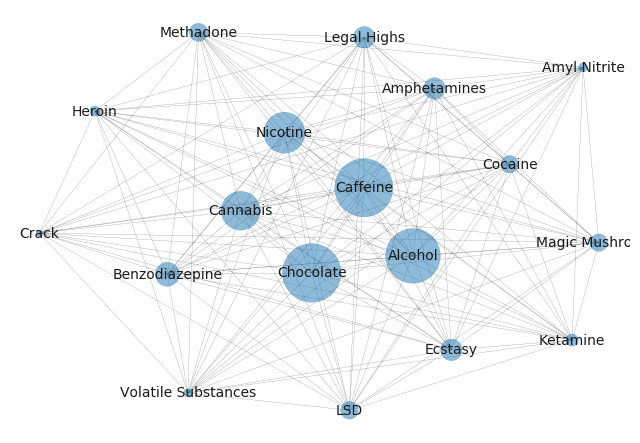

In [38]:
plot_networkx_graph(G)

Can it be improved? The weight should reflect how strongly the use of one drug correlates with the other. If substances are used more often, their over represented in the weight. To fix that we can use rates. What rate of the cannabis user also drink coffee and what percentage of coffee drinkers also use cannabis? Add both and use it as weight.

In [21]:
adjusted_weights = {}
for key in weights.keys():
    adjusted_weights[key] = weights[key]*(
        (1/df[key.split('_')[0] + '_user'][df[key.split('_')[0] + '_user']].count()) # 1/number of users of first part of key
        +(1/df[key.split('_')[1] + '_user'][df[key.split('_')[1] + '_user']].count())) # 1/number of users of second part of key
    
G.add_weighted_edges_from([(drug_dict[key.split('_')[0]], drug_dict[key.split('_')[1]], adjusted_weights[key]) for key in adjusted_weights.keys()])   

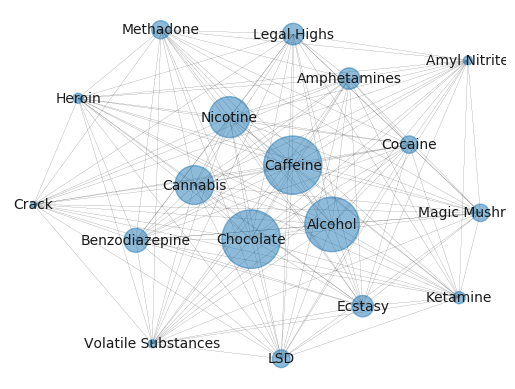

In [39]:
plot_networkx_graph(G)

## How does the age influence substance use?

In [23]:
for d in drugs:
    df[d + '_user'] = df[d + '_user'].astype(int)

In [24]:
df[[d + '_user' for d in drugs]].head()

,alcohol_user,amphet_user,amyl_user,benzos_user,caff_user,cannabis_user,choc_user,coke_user,crack_user,ecstasy_user,heroin_user,ketamine_user,legalh_user,lsd_user,meth_user,shrooms_user,nicotine_user,vsa_user
0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [25]:
sns.set()
sns.set_style('whitegrid')
ages = sorted(list(df.age.unique()))
drug_user =[d + '_user' for d in drugs]
dat = []
for age in ages:
    dat.append([sum(df[df.age == age][d]) for d in drug_user])

In [26]:
plf = pd.DataFrame(data = dat, index = ages, columns = drug_labels)

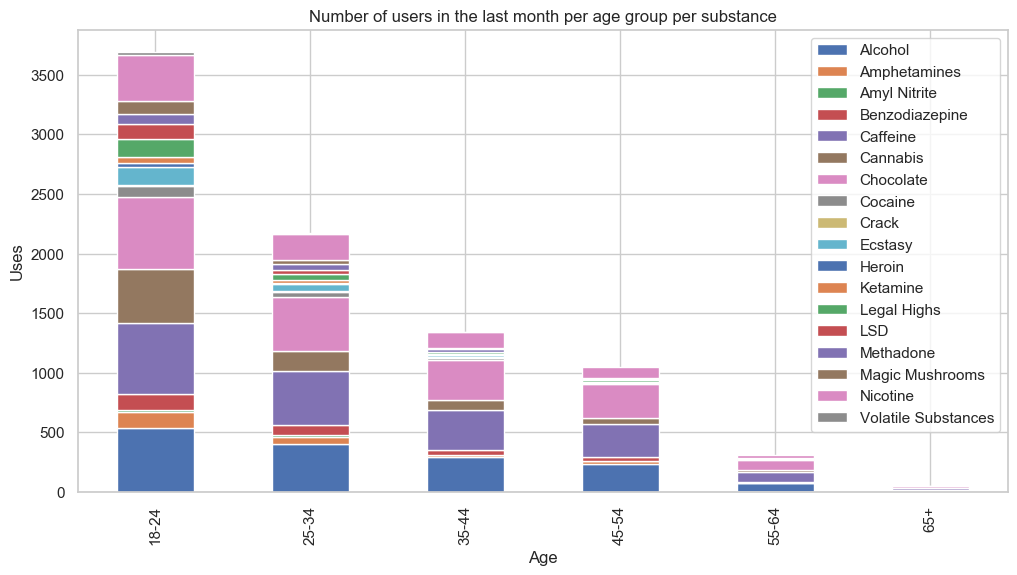

In [27]:
age_graph = plf.plot(kind = 'bar', stacked = True, figsize = (12,6))
plt.xlabel('Age')
plt.ylabel('Uses')
plt.title('Number of users in the last month per age group per substance')
plt.style.use('seaborn')
plt.savefig('graphs/uses_over_age.png', bbox_inches = 'tight')

That is hard to read, we'll only show the most important ones and combine the rest in others.

In [49]:
drug_freq = {s : sum(df[s + '_user']) for s in drugs}
drug_freq

{'alcohol': 1742,
 'amphet': 433,
 'amyl': 132,
 'benzos': 532,
 'caff': 1816,
 'cannabis': 991,
 'choc': 1833,
 'coke': 414,
 'crack': 79,
 'ecstasy': 513,
 'heroin': 118,
 'ketamine': 206,
 'legalh': 561,
 'lsd': 376,
 'meth': 319,
 'shrooms': 428,
 'nicotine': 1053,
 'vsa': 93}

## How many people use how many different Substances?

Redefine 'user'.

In [28]:
for d in drugs:
    df[d + '_user'] = [int(u in (3,4,5,6)) for u in df[d]]

In [29]:
diff_subs = [0] * len(drugs)
for _, row in df.iterrows():
    row['number_of_substances'] = sum([row[d] for d in drug_user])
    diff_subs[row['number_of_substances']] += 1

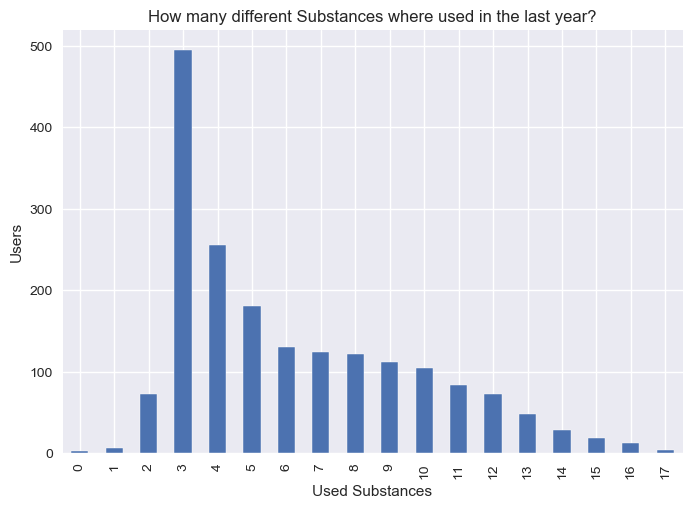

In [30]:
pd.DataFrame(enumerate(diff_subs, 0))[1].plot(kind = 'bar')
plt.xlabel('Used Substances')
plt.ylabel('Users')
plt.title('How many different Substances where used in the last year?')
plt.style.use('seaborn')
plt.savefig('graphs/substances_per_user.png', bbox_inches = 'tight')

## Other analysis

Gender

In [31]:
df.gender.value_counts()

Male      940
Female    937
Name: gender, dtype: int64

In [43]:
degrees = dict(df.education.value_counts())
degrees_labels = {'Some college or university, no certificate or degree': 'Some university',
 'university_degree': 'University',
 'masters_degree': 'Masters',
 'professional_certificate/ diploma': 'Professional',
 'left_school': 'Left School < 17y',
 'left_school_at_18 years': 'Left School at 18y',
 'doctorate_degree': 'Doctorate',
 'left_school_at_17_years': 'Left school at 17y'}

In [45]:
sorted_degree = {}
for i in [4, 7, 5, 0, 3, 1, 2, 6]:
    sorted_degree[degrees_labels[list(degrees.keys())[i]]] = list(degrees.values())[i]
sorted_degree

{'Left School < 17y': 126,
 'Left school at 17y': 29,
 'Left School at 18y': 99,
 'Some university': 503,
 'Professional': 270,
 'University': 478,
 'Masters': 283,
 'Doctorate': 89}

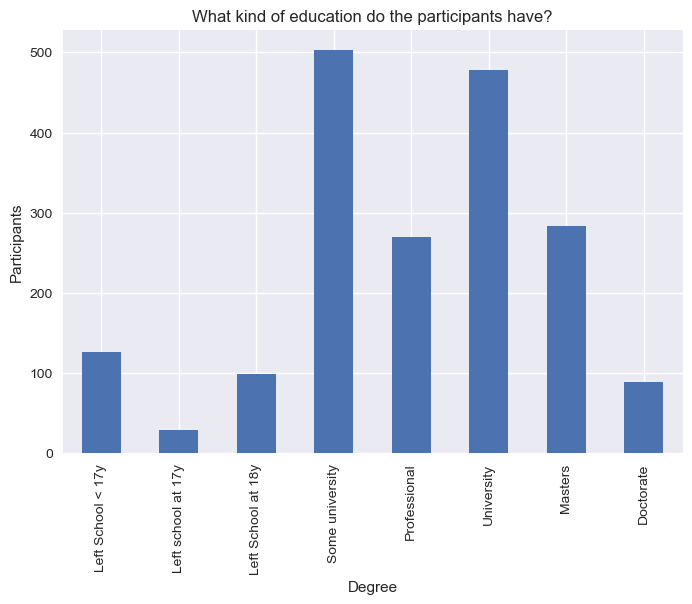

In [46]:
dfe = pd.DataFrame(sorted_degree.values(), index = sorted_degree.keys())
dfe.plot(kind = 'bar')
plt.xlabel('Degree')
plt.ylabel('Participants')
plt.title('What kind of education do the participants have?')
plt.style.use('seaborn')
plt.legend().remove()
plt.savefig('graphs/degrees.png', bbox_inches = 'tight')

# Appendix

## Score translation functions

In [35]:
def nscore_translator(n):
    '''
    GIves you the correlating z score to any n score and vice versa.
    If n is a float it will be seen as a z score and be translated into a n score.
    Returns False if translation can't be made.
    '''    

    dns = {12 : -3.46436,
    13 : -3.15735 ,
    30 : -0.58016 ,
    47 : 1.13281,
    14 : -2.75696, 
    31 : -0.46725 ,
    48 : 1.23461,
    15 : -2.52197,
    32 : -0.34799 ,
    49 : 1.37297,
    16 : -2.42317, 
    33 : -0.24649,
    50 : 1.49158,
    17 : -2.34360, 
    34 : -0.14882 ,
    51 : 1.60383,
    18 : -2.21844, 
    35 : -0.05188 ,
    52 : 1.72012,
    19 : -2.05048, 
    36 : 0.04257 ,
    53 : 1.83990,
    20 : -1.86962, 
    37 : 0.13606 ,
    54 : 1.98437,
    21 : -1.69163, 
    38 : 0.22393 ,
    55 : 2.12700,
    22 : -1.55078, 
    39 : 0.31287 ,
    56 : 2.28554,
    23 : -1.43907, 
    40 : 0.41667 ,
    57 : 2.46262,
    24 : -1.32828, 
    41 : 0.52135 ,
    58 : 2.61139,
    25 : -1.19430, 
    42 : 0.62967 ,
    59 : 2.82196,
    26 : -1.05308, 
    43 : 0.73545 ,
    60 : 3.27393,
    27 : -0.92104, 
    44 : 0.82562,
    28 : -0.79151, 
    45 : 0.91093,
    29 : -0.67825, 
    46 : 1.02119}
    
    returnee = False
    if type(n) == int  and (n in dns.keys()):
        returnee = dns[n]
    else:
        if n in dns.values():
            for key, value in dns.items():
                if value == n:
                    returnee = key
    return returnee

def escore_translator(n):
    '''
    GIves you the correlating z score to any n score and vice versa.
    If n is a float it will be seen as a z score and be translated into a n score.
    Returns False if translation can't be made.
    '''    
    des = {16 : -3.27393, 31 : -1.23177, 45 : 0.80523,
    18 : -3.00537, 32 : -1.09207, 46 : 0.96248,
    19 : -2.72827, 33 : -0.94779, 47 : 1.11406,
    20 : -2.53830, 34 : -0.80615, 48 : 1.28610,
    21 : -2.44904, 35 : -0.69509, 49 : 1.45421,
    22 : -2.32338, 36 : -0.57545, 50 : 1.58487,
    23 : -2.21069, 37 : -0.43999, 51 : 1.74091,
    24 : -2.11437, 38 : -0.30033, 52 : 1.93886,
    25 : -2.03972, 39 : -0.15487, 53 : 2.12700,
    26 : -1.92173, 40 : 0.00332, 54 : 2.32338,
    27 : -1.76250, 41 : 0.16767, 55 : 2.57309,
    28 : -1.63340, 42 : 0.32197, 56 : 2.85950,
    29 : -1.50796, 43 : 0.47617, 58 : 3.00537,
    30 : -1.37639, 44 : 0.63779, 59 : 3.27393}
    
    returnee = False
    if type(n) == int  and (n in des.keys()):
        returnee = des[n]
    else:
        if n in dns.values():
            for key, value in des.items():
                if value == n:
                    returnee = key
    return returnee

def oscore_translator(n):
    '''
    GIves you the correlating z score to any n score and vice versa.
    If n is a float it will be seen as a z score and be translated into a n score.
    Returns False if translation can't be made.
    '''    
    des = {24 : -3.27393, 38 : -1.11902, 50 : 0.58331,
    26 : -2.85950, 39 : -0.97631, 51 : 0.72330,
    28 : -2.63199, 40 : -0.84732, 52 : 0.88309,
    29 : -2.39883, 41 : -0.71727, 53 : 1.06238,
    30 : -2.21069, 42 : -0.58331, 54 : 1.24033,
    31 : -2.09015, 43 : -0.45174, 55 : 1.43533,
    32 : -1.97495, 44 : -0.31776, 56 : 1.65653,
    33 : -1.82919, 45 : -0.17779, 57 : 1.88511,
    34 : -1.68062, 46 : -0.01928, 58 : 2.15324,
    35 : -1.55521, 47 : 0.14143 ,59 : 2.44904,
    36 : -1.42424, 48 : 0.29338, 60 : 2.90161,
    37 : -1.27553, 49 : 0.44585}
    
    returnee = False
    if type(n) == int  and (n in des.keys()):
        returnee = des[n]
    else:
        if n in dns.values():
            for key, value in des.items():
                if value == n:
                    returnee = key
    return returnee

def ascore_translator(n):
    '''
    GIves you the correlating z score to any n score and vice versa.
    If n is a float it will be seen as a z score and be translated into a n score.
    Returns False if translation can't be made.
    '''    
    des = {12 : -3.46436, 34 : -1.34289, 48 : 0.76096,
    16 : -3.15735, 35 : -1.21213, 49 : 0.94156,
    18 : -3.00537, 36 : -1.07533, 50 : 1.11406,
    23 : -2.90161, 37 : -0.91699, 51 : 1.2861,
    24 : -2.78793, 38 : -0.76096, 52 : 1.45039,
    25 : -2.70172, 39 : -0.60633, 53 : 1.61108,
    26 : -2.53830, 40 : -0.45321, 54 : 1.81866,
    27 : -2.35413, 41 : -0.30172, 55 : 2.03972,
    28 : -2.21844, 42 : -0.15487, 56 : 2.23427,
    29 : -2.07848, 43 : -0.01729, 57 : 2.46262,
    30 : -1.92595, 44 : 0.13136, 58 : 2.75696,
    31 : -1.77200, 45 : 0.28783, 59 : 3.15735,
    32 : -1.62090, 46 : 0.43852, 60 : 3.46436,
    33 : -1.47955, 47 : 0.59042}
           
    returnee = False
    if type(n) == int  and (n in des.keys()):
        returnee = des[n]
    else:
        if n in dns.values():
            for key, value in des.items():
                if value == n:
                    returnee = key
    return returnee

def cscore_translator(n):
    '''
    GIves you the correlating z score to any n score and vice versa.
    If n is a float it will be seen as a z score and be translated into a n score.
    Returns False if translation can't be made.
    '''    
    des = {17 : -3.46436, 32 : -1.25773, 46 : 0.58489,
    19 : -3.15735, 33 : -1.13788, 47 : 0.7583,
    20 : -2.90161, 34 : -1.01450, 48 : 0.93949,
    21 : -2.72827, 35 : -0.89891, 49 : 1.13407,
    22 : -2.57309, 36 : -0.78155, 50 : 1.30612,
    23 : -2.42317, 37 : -0.65253, 51 : 1.46191,
    24 : -2.30408, 38 : -0.52745, 52 : 1.63088,
    25 : -2.18109, 39 : -0.40581, 53 : 1.81175,
    26 : -2.04506, 40 : -0.27607, 54 : 2.04506,
    27 : -1.92173, 41 : -0.14277, 55 : 2.33337,
    28 : -1.78169, 42 : -0.00665, 56 : 2.63199,
    29 : -1.64101, 43 : 0.12331, 57 : 3.00537,
    30 : -1.51840, 44 : 0.25953, 59 : 3.46436,
    31 : -1.38502, 45 : 0.41594}
           
    returnee = False
    if type(n) == int  and (n in des.keys()):
        returnee = des[n]
    else:
        if n in dns.values():
            for key, value in des.items():
                if value == n:
                    returnee = key
    return returnee



In [36]:
nscore_translator(80)

False